<a href="https://colab.research.google.com/github/PranavShashidhara/Netflix-Recommendation-system/blob/main/EDA_of_Netflix_mini_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
data_df = pd.read_parquet('https://netflix-project-data.s3.us-east-1.amazonaws.com/Preprocessed+data/Small_filtered_data.parquet')
data_df.head()

,Movie_id,User_id,Ratings,Date
0,7,2456613,3,2004-03-31
1,7,1979083,2,2004-05-12
2,7,1391523,3,2004-04-27
3,7,1744889,1,2005-08-25
4,7,995497,2,2005-02-14


In [9]:
import pandas as pd

# Assuming 'data_df' is your DataFrame
def check_ratings_range(data_df):
    """Checks if all ratings in the 'Ratings' column are within the range of 0 to 5.

    Args:
        data_df: The Pandas DataFrame containing the ratings data.

    Returns:
        True if all ratings are within the range, False otherwise.
    """
    # Convert 'Ratings' column to numeric, errors='coerce' handles non-numeric values
    data_df['Ratings'] = pd.to_numeric(data_df['Ratings'], errors='coerce')

    # Check if all ratings are within the range
    are_ratings_within_range = data_df['Ratings'].between(0, 5).all()
    return are_ratings_within_range


# Call the function to check the ratings range
ratings_within_range = check_ratings_range(data_df)

if ratings_within_range:
    print("All ratings are within the range of 0 to 5.")
else:
    print("Some ratings are outside the range of 0 to 5.")

    # Optionally, print rows with ratings outside the range:
    out_of_range_rows = data_df[~data_df['Ratings'].between(0, 5)]
    print("\nRows with ratings outside the range:")
    print(out_of_range_rows)

All ratings are within the range of 0 to 5.


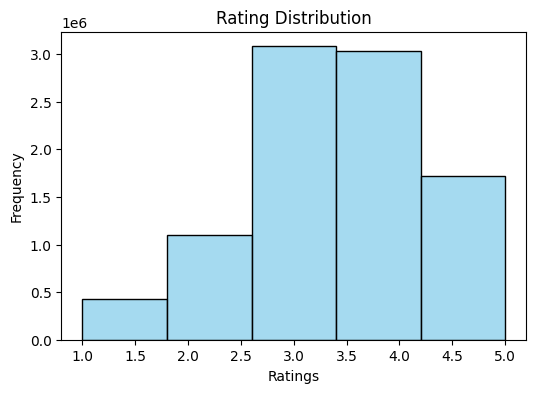

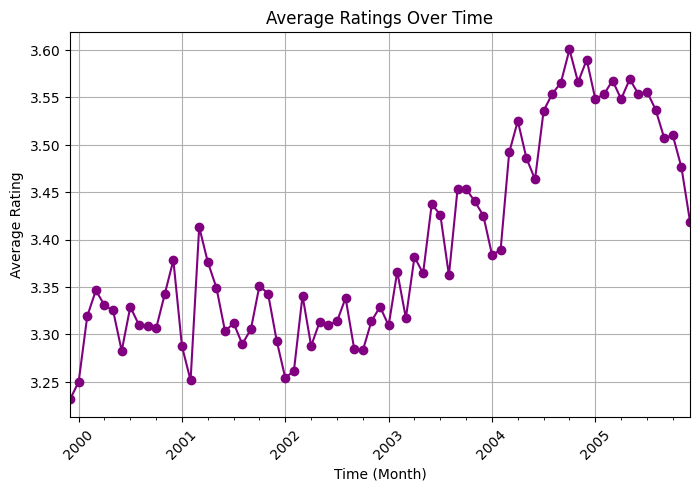

In [10]:
# 1. Rating Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data_df['Ratings'], bins=5, kde=False, color='skyblue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# 2. Ratings Over Time (Average Rating per Month)
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df['Month'] = data_df['Date'].dt.to_period('M')
avg_rating_per_month = data_df.groupby('Month')['Ratings'].mean()

plt.figure(figsize=(8, 5))
avg_rating_per_month.plot(kind='line', marker='o', color='purple')
plt.title('Average Ratings Over Time')
plt.xlabel('Time (Month)')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


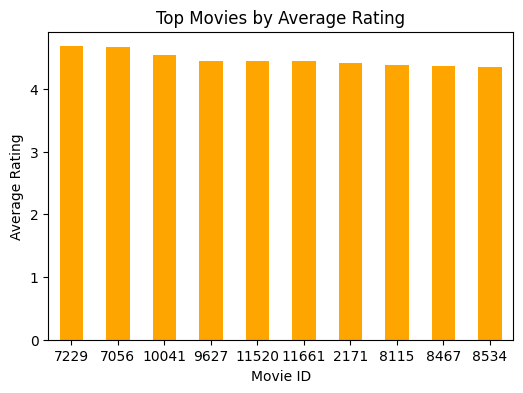

In [12]:
avg_ratings_per_movie = data_df.groupby('Movie_id')['Ratings'].mean().sort_values(ascending=False)

# Top movies with their ratings
plt.figure(figsize=(6, 4))
avg_ratings_per_movie.head(10).plot(kind='bar', color='orange')
plt.title('Top Movies by Average Rating')
plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

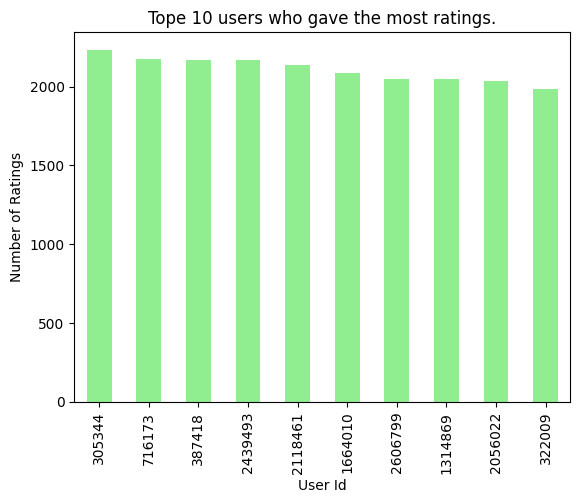

In [17]:
# Top 10 Users who gave the most ratings
user_ratings_count = data_df.groupby('User_id').size().sort_values(ascending=False)
user_ratings_count.head(10).plot(kind='bar', color='lightgreen')
plt.title('Tope 10 users who gave the most ratings.')
plt.xlabel('User Id')
plt.ylabel('Number of Ratings')
plt.show()

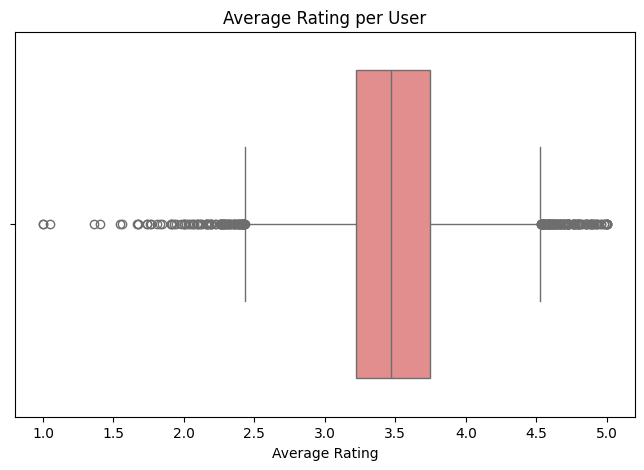

In [19]:
# Average rating per user
avg_rating_per_user = data_df.groupby('User_id')['Ratings'].mean()

plt.figure(figsize=(8,5))
sns.boxplot(x=avg_rating_per_user, color='lightcoral')
plt.title('Average Rating per User')
plt.xlabel('Average Rating')
plt.show()

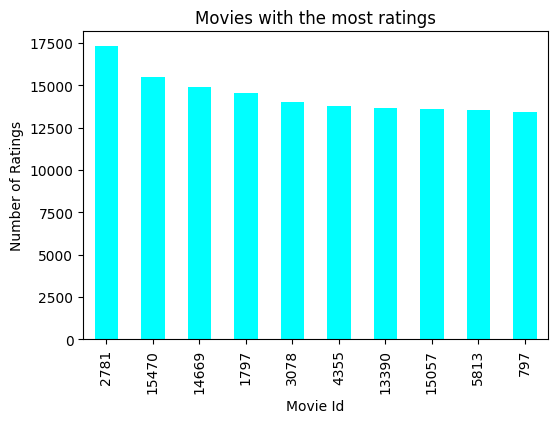

In [21]:
most_rated_movies = data_df.groupby('Movie_id').size().sort_values(ascending=False)

plt.figure(figsize=(6,4))
most_rated_movies.head(10).plot(kind='bar', color='cyan')
plt.title('Movies with the most ratings')
plt.xlabel('Movie Id')
plt.ylabel('Number of Ratings')
plt.show()

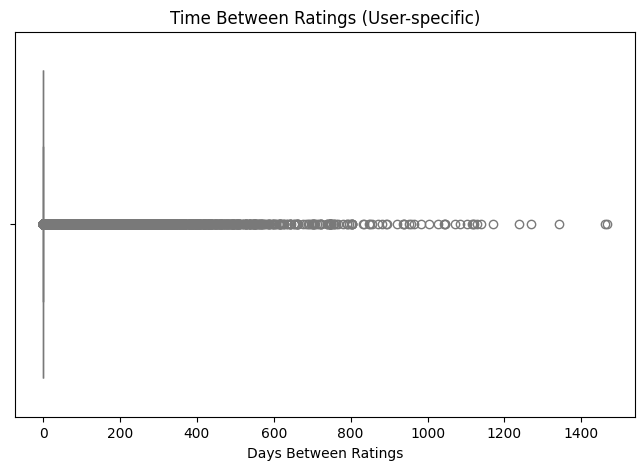

In [30]:
# Time between ratings by each user.
data_df = data_df.sort_values(by=['User_id', 'Date'])

data_df['Rating_Date_Diff'] = data_df.groupby('User_id')['Date'].diff().dt.days

plt.figure(figsize=(8, 5))
sns.boxplot(x=data_df['Rating_Date_Diff'], color='lightblue')
plt.title('Time Between Ratings (User-specific)')
plt.xlabel('Days Between Ratings')
plt.show()


To Jump start the recommendations Netflix generally asks us to rate a few movies based on our liking as mentioned in their website: https://help.netflix.com/en/node/100639#:~:text=%E2%80%9CJump%20starting%E2%80%9D%20the%20recommendations%20system,titles%20you%20like%20is%20optional.

That is the reason why there are so many ratings on the first day and then drops of later on.

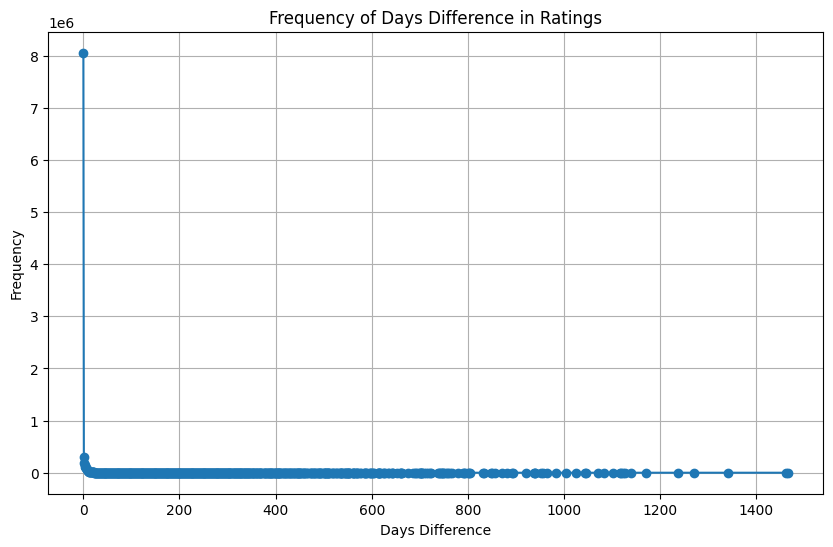

In [33]:
day_frequencies = data_df['Rating_Date_Diff'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(day_frequencies.index, day_frequencies.values, marker='o', linestyle='-')
plt.xlabel('Days Difference')
plt.ylabel('Frequency')
plt.title('Frequency of Days Difference in Ratings')
plt.grid(True)
plt.show()